In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal
import random

import h5py

In [2]:
%matplotlib notebook

In [3]:
import sys
sys.path.append('../../../../nadavp/new_trap/Tools/')
sys.path.append('../../../../nadavp/new_trap/Tools/StatFramework/')
import BeadDataFile
from discharge_tools import *

In [4]:
%reload_ext autoreload
%autoreload 2

In [5]:
from likelihood_calculator import likelihood_analyser
from likelihood_calculator import GravityFramework
gfw = GravityFramework.GravityFramework()

In [111]:
import datetime as dt

def get_temperature_and_pressure(date,from_hour,to_hour):
    f=[]
    for i in np.arange(from_hour,to_hour+1,1):
        if(i<10):
            hour = "0%d" %i
        if(i>9):
            hour ="%d" %i
        f.append(h5py.File("/data/SC_data/TemperatureAndPressure%s/TempAndPressure%s_%s.hdf5" %(date,date,hour)))
        print("/data/SC_data/TemperatureAndPressure%s/TempAndPressure%s_%s.hdf5" %(date,date,hour))
    airtemperature_list = []
    surfacetemperature_list = []
    pressure_list = []
    for i in np.arange(0,len(f),1):
        airtemperature_list.extend(list(f[i]["AirTemperature/AirTemperatures"]))
        surfacetemperature_list.extend(list(f[i]["SurfaceTemperature/SurfaceTemperatures"]))
        pressure_list.extend(list(f[i]["Pressure/Pressures"]))
    [f_.close() for f_ in f] ## good programing       
    return airtemperature_list, surfacetemperature_list, pressure_list

def from_timestamp_to_temperature(start_time,end_time):
    transform_time_start = dt.datetime.fromtimestamp(start_time/1e9)
    transform_time_end = dt.datetime.fromtimestamp(end_time/1e9)
    year = "%d" %transform_time_start.year
    if(transform_time_start.month<10):month="0"+ "%d"%transform_time_start.month
    else:month="%d"%transform_time_start.month
    if(transform_time_start.day<10):day="0"+ "%d"%transform_time_start.day
    else:day="%d"%transform_time_start.day
    date = year + month + day
    from_hour = transform_time_start.hour
    to_hour = transform_time_end.hour
    print(date,from_hour,to_hour)
    airtemperature_list, surfacetemperature_list, pressure_list = get_temperature_and_pressure(date,from_hour,to_hour)
    starting_point = transform_time_start.minute * 60 + transform_time_start.second
    end_point = transform_time_end.minute * 60 + transform_time_end.second
    print(starting_point,end_point)
    return airtemperature_list[starting_point:-end_point], surfacetemperature_list[starting_point:-end_point], pressure_list[starting_point:-end_point]

### Load data

In [56]:
foldername = r'/data/new_trap/20200101/Bead1/Discharge/'
bdf_discharge = load_dir(dirname=foldername)

84  files in folder
84  files loaded


In [57]:
bb = bdf_discharge[0]
response_x = [np.std(bb.response_at_freq('z',drive_freq=151)) for bb in bdf_discharge]

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


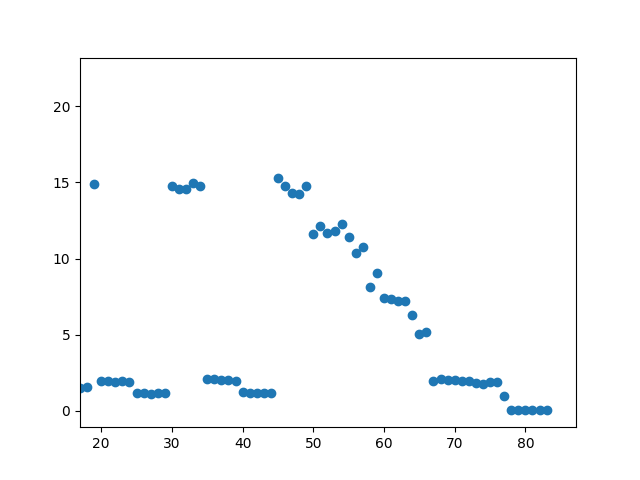

[(17, 87.15665322580647)]

In [58]:
_, ax = plt.subplots()
ax.scatter(range(len(response_x)), response_x/response_x[70]*2)
ax.set(xlim=(17,None))

In [59]:
bdf_x = bdf_discharge[20:25]
charges = 15
m1s = gfw.build_x_response(bdf_x, drive_freq=151,charges=charges)

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


***************************************************
X2-amplitude:  1.90e+02
reduced chi2:  21.84143281460796
***************************************************
X2-amplitude:  1.90e+02
reduced chi2:  20.311943069551393
***************************************************
X2-amplitude:  1.83e+02
reduced chi2:  21.41963144324607
***************************************************
X2-amplitude:  1.79e+02
reduced chi2:  18.08738324148199
***************************************************
X2-amplitude:  1.78e+02
reduced chi2:  18.3884538179006
X3 to X2 ratio: 0.11234133868660567
X2 response (amplitude): 184.11156353045553


In [60]:
foldername = r'/data/new_trap/20200101/Bead1/Shaking/Shaking26/'
datasets_num = 1000
gfw.BDFs = load_dir(foldername, file_prefix='Shaking26',max_file=datasets_num)
# gfw.BDFs = bdf_x

1000  files in folder
1000  files loaded


In [62]:
bb = gfw.BDFs[0]
np.std(bb.cant_pos[1]*50)*np.sqrt(2)*2, 389.7-np.mean(bb.cant_pos[0]*50*1.009)-2.4, np.mean(bb.cant_pos[0]*50)

array([ 998,  998, 1000, ...,  998,  997, 1004], dtype=int32)

<IPython.core.display.Javascript object>


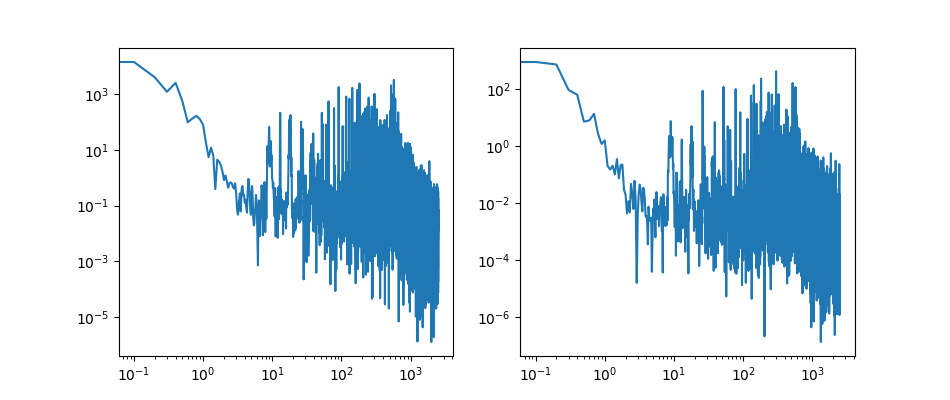

In [13]:
gfw.plot_dataset(bdf_i=2)

In [40]:
gfw.build_noise_array(sideband_freq=152, bandwidth=1)

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


x2 noise rms:  1.2300448127562214
x3 noise rms:  0.2598185675106557


In [48]:
# freq=3
# gfw.build_noise_array(sideband_freq=freq*4+2)
tmp_amp3, m1s_3 = gfw.build_harmonics_array(freq=13*3)

0 / 1000


/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


***************************************************
X2-amplitude:  9.96e+01
reduced chi2:  261.12159886336286
1 / 1000
***************************************************
X2-amplitude:  1.22e+01
reduced chi2:  21.214476704559583
2 / 1000
***************************************************
X2-amplitude:  8.16e+00
reduced chi2:  9.411486720033478
3 / 1000
***************************************************
X2-amplitude:  8.11e+00
reduced chi2:  8.904321182929456
4 / 1000
***************************************************
X2-amplitude:  7.07e+00
reduced chi2:  8.07473590377568
5 / 1000
***************************************************
X2-amplitude:  6.85e+00
reduced chi2:  7.026789453962674
6 / 1000
***************************************************
X2-amplitude:  7.35e+00
reduced chi2:  12.711425899196858
7 / 1000
***************************************************
X2-amplitude:  4.37e+00
reduced chi2:  6.004444146174278
8 / 1000
***************************************************
X2

***************************************************
X2-amplitude:  4.33e+00
reduced chi2:  8.853720109675097
70 / 1000
***************************************************
X2-amplitude:  7.40e+00
reduced chi2:  17.764023167365007
71 / 1000
***************************************************
X2-amplitude:  1.21e+00
reduced chi2:  13.749108775842913
72 / 1000
***************************************************
X2-amplitude:  8.00e+00
reduced chi2:  19.489807048272855
73 / 1000
***************************************************
X2-amplitude:  7.22e+00
reduced chi2:  28.477652449457523
74 / 1000
***************************************************
X2-amplitude:  3.82e+00
reduced chi2:  49.09998367986397
75 / 1000
***************************************************
X2-amplitude:  4.92e+00
reduced chi2:  29.71202068163386
76 / 1000
***************************************************
X2-amplitude:  8.38e+00
reduced chi2:  55.17956592229522
77 / 1000
********************************************

***************************************************
X2-amplitude:  6.55e+00
reduced chi2:  21.804328024887237
139 / 1000
***************************************************
X2-amplitude:  8.19e-01
reduced chi2:  12.935883554922677
140 / 1000
***************************************************
X2-amplitude:  5.02e+00
reduced chi2:  50.55066391096565
141 / 1000
***************************************************
X2-amplitude:  2.78e+00
reduced chi2:  21.509540763925923
142 / 1000
***************************************************
X2-amplitude:  4.03e+00
reduced chi2:  12.742920215053132
143 / 1000
***************************************************
X2-amplitude:  2.44e+00
reduced chi2:  63.213928888591546
144 / 1000
***************************************************
X2-amplitude:  1.77e+00
reduced chi2:  11.082816666042767
145 / 1000
***************************************************
X2-amplitude:  9.15e-01
reduced chi2:  4.464534628337973
146 / 1000
**********************************

***************************************************
X2-amplitude:  8.61e+00
reduced chi2:  3.276037058980411
208 / 1000
***************************************************
X2-amplitude:  8.82e+00
reduced chi2:  9.280714872805763
209 / 1000
***************************************************
X2-amplitude:  8.84e+00
reduced chi2:  2.062415445576571
210 / 1000
***************************************************
X2-amplitude:  9.11e+00
reduced chi2:  1.3048000381733005
211 / 1000
***************************************************
X2-amplitude:  1.04e+01
reduced chi2:  2.9585247736420843
212 / 1000
***************************************************
X2-amplitude:  1.02e+01
reduced chi2:  1.2878158594605127
213 / 1000
***************************************************
X2-amplitude:  9.82e+00
reduced chi2:  1.1458441822556251
214 / 1000
***************************************************
X2-amplitude:  1.01e+01
reduced chi2:  1.6806288838970462
215 / 1000
***********************************

***************************************************
X2-amplitude:  2.30e+00
reduced chi2:  33.1400110813554
276 / 1000
***************************************************
X2-amplitude:  1.91e+00
reduced chi2:  33.77628950350015
277 / 1000
***************************************************
X2-amplitude:  3.00e+00
reduced chi2:  33.011799233024846
278 / 1000
***************************************************
X2-amplitude:  2.10e+00
reduced chi2:  24.210665619601222
279 / 1000
***************************************************
X2-amplitude:  2.07e+00
reduced chi2:  40.533445829069386
280 / 1000
***************************************************
X2-amplitude:  2.00e+00
reduced chi2:  17.95526631645443
281 / 1000
***************************************************
X2-amplitude:  2.70e+00
reduced chi2:  43.391224963697155
282 / 1000
***************************************************
X2-amplitude:  2.37e+00
reduced chi2:  16.23088178749411
283 / 1000
*************************************

***************************************************
X2-amplitude:  1.97e+01
reduced chi2:  6.7918580351397075
345 / 1000
***************************************************
X2-amplitude:  2.01e+01
reduced chi2:  14.175541113694072
346 / 1000
***************************************************
X2-amplitude:  2.00e+01
reduced chi2:  4.87433603052217
347 / 1000
***************************************************
X2-amplitude:  1.91e+01
reduced chi2:  5.290332899477035
348 / 1000
***************************************************
X2-amplitude:  1.75e+01
reduced chi2:  3.997944308292695
349 / 1000
***************************************************
X2-amplitude:  1.61e+01
reduced chi2:  4.893999575421582
350 / 1000
***************************************************
X2-amplitude:  1.77e+01
reduced chi2:  2.612976889854105
351 / 1000
***************************************************
X2-amplitude:  1.94e+01
reduced chi2:  3.790917940814139
352 / 1000
***************************************

***************************************************
X2-amplitude:  3.55e+00
reduced chi2:  11.956077889839573
414 / 1000
***************************************************
X2-amplitude:  2.95e+00
reduced chi2:  15.814645125171515
415 / 1000
***************************************************
X2-amplitude:  2.65e+00
reduced chi2:  5.415954365213579
416 / 1000
***************************************************
X2-amplitude:  2.59e+00
reduced chi2:  2.629132973012414
417 / 1000
***************************************************
X2-amplitude:  2.79e+00
reduced chi2:  1.1422722875369982
418 / 1000
***************************************************
X2-amplitude:  2.66e+00
reduced chi2:  8.575700457688614
419 / 1000
***************************************************
X2-amplitude:  1.95e+00
reduced chi2:  14.03955028425716
420 / 1000
***************************************************
X2-amplitude:  8.17e-01
reduced chi2:  9.035680026929729
421 / 1000
*************************************

***************************************************
X2-amplitude:  7.49e+00
reduced chi2:  152.06697570024335
483 / 1000
***************************************************
X2-amplitude:  2.72e+00
reduced chi2:  23.066086065714817
484 / 1000
***************************************************
X2-amplitude:  2.81e+00
reduced chi2:  26.196053254086607
485 / 1000
***************************************************
X2-amplitude:  1.39e+01
reduced chi2:  143.59635641355848
486 / 1000
***************************************************
X2-amplitude:  7.98e+00
reduced chi2:  99.32173154223673
487 / 1000
***************************************************
X2-amplitude:  1.73e+01
reduced chi2:  99.83274445003757
488 / 1000
***************************************************
X2-amplitude:  1.23e+01
reduced chi2:  180.1602219413367
489 / 1000
***************************************************
X2-amplitude:  1.71e+01
reduced chi2:  198.55362438347856
490 / 1000
***********************************

***************************************************
X2-amplitude:  2.37e+01
reduced chi2:  327.11827955635124
551 / 1000
***************************************************
X2-amplitude:  1.88e+01
reduced chi2:  274.5626166603961
552 / 1000
***************************************************
X2-amplitude:  2.11e+01
reduced chi2:  416.9638981794972
553 / 1000
***************************************************
X2-amplitude:  2.24e+01
reduced chi2:  224.4803835533919
554 / 1000
***************************************************
X2-amplitude:  2.02e+01
reduced chi2:  213.43573928852442
555 / 1000
***************************************************
X2-amplitude:  2.56e+01
reduced chi2:  396.88622805480514
556 / 1000
***************************************************
X2-amplitude:  3.58e+01
reduced chi2:  316.98145240227234
557 / 1000
***************************************************
X2-amplitude:  1.89e+01
reduced chi2:  1116.6800941660379
558 / 1000
***********************************

***************************************************
X2-amplitude:  2.84e+00
reduced chi2:  580.3618065447932
620 / 1000
***************************************************
X2-amplitude:  1.11e+01
reduced chi2:  1021.9601215208178
621 / 1000
***************************************************
X2-amplitude:  6.21e+00
reduced chi2:  623.2391132359446
622 / 1000
***************************************************
X2-amplitude:  5.45e+00
reduced chi2:  841.9546893545323
623 / 1000
***************************************************
X2-amplitude:  3.88e+00
reduced chi2:  573.1219323843893
624 / 1000
***************************************************
X2-amplitude:  1.01e+01
reduced chi2:  527.6454474985829
625 / 1000
***************************************************
X2-amplitude:  6.83e+00
reduced chi2:  549.6644919919502
626 / 1000
***************************************************
X2-amplitude:  2.78e+00
reduced chi2:  1264.5672639510103
627 / 1000
**************************************

***************************************************
X2-amplitude:  3.18e+01
reduced chi2:  618.8925990460555
689 / 1000
***************************************************
X2-amplitude:  3.13e+01
reduced chi2:  372.4896302392936
690 / 1000
***************************************************
X2-amplitude:  2.67e+01
reduced chi2:  466.08822656550154
691 / 1000
***************************************************
X2-amplitude:  3.42e+01
reduced chi2:  655.4970188506105
692 / 1000
***************************************************
X2-amplitude:  2.88e+01
reduced chi2:  592.6210910430348
693 / 1000
***************************************************
X2-amplitude:  3.36e+01
reduced chi2:  358.254633414344
694 / 1000
***************************************************
X2-amplitude:  2.95e+01
reduced chi2:  338.4425911971529
695 / 1000
***************************************************
X2-amplitude:  1.88e+01
reduced chi2:  238.18353216137734
696 / 1000
***************************************

***************************************************
X2-amplitude:  9.11e+00
reduced chi2:  1415.2310687856595
758 / 1000
***************************************************
X2-amplitude:  1.22e+01
reduced chi2:  880.7508009309665
759 / 1000
***************************************************
X2-amplitude:  3.95e+00
reduced chi2:  673.6519829600594
760 / 1000
***************************************************
X2-amplitude:  4.26e+00
reduced chi2:  447.300835982212
761 / 1000
***************************************************
X2-amplitude:  1.69e+01
reduced chi2:  531.3823717772837
762 / 1000
***************************************************
X2-amplitude:  7.03e+00
reduced chi2:  1070.1644257194957
763 / 1000
***************************************************
X2-amplitude:  3.31e+00
reduced chi2:  471.2645638207858
764 / 1000
***************************************************
X2-amplitude:  1.41e+01
reduced chi2:  930.6115229005286
765 / 1000
***************************************

***************************************************
X2-amplitude:  3.13e+01
reduced chi2:  1352.2556612383103
827 / 1000
***************************************************
X2-amplitude:  2.59e+00
reduced chi2:  1637.3552870047201
828 / 1000
***************************************************
X2-amplitude:  7.82e+00
reduced chi2:  2286.644690240916
829 / 1000
***************************************************
X2-amplitude:  3.55e+00
reduced chi2:  1709.1091204561635
830 / 1000
***************************************************
X2-amplitude:  2.15e+00
reduced chi2:  2232.646650796908
831 / 1000
***************************************************
X2-amplitude:  2.22e+01
reduced chi2:  1297.9741346824958
832 / 1000
***************************************************
X2-amplitude:  3.18e+00
reduced chi2:  3552.7963694522505
833 / 1000
***************************************************
X2-amplitude:  4.81e+00
reduced chi2:  1471.1962427082685
834 / 1000
**********************************

***************************************************
X2-amplitude:  2.04e+01
reduced chi2:  604.5992080015369
896 / 1000
***************************************************
X2-amplitude:  3.09e+01
reduced chi2:  399.45214512366863
897 / 1000
***************************************************
X2-amplitude:  1.67e+01
reduced chi2:  487.20818375704886
898 / 1000
***************************************************
X2-amplitude:  2.06e+01
reduced chi2:  1069.61562117848
899 / 1000
***************************************************
X2-amplitude:  2.16e+01
reduced chi2:  711.0587495329131
900 / 1000
***************************************************
X2-amplitude:  2.97e+01
reduced chi2:  745.3431079823556
901 / 1000
***************************************************
X2-amplitude:  1.88e+01
reduced chi2:  363.58146964616355
902 / 1000
***************************************************
X2-amplitude:  2.21e+01
reduced chi2:  412.90066655102345
903 / 1000
*************************************

***************************************************
X2-amplitude:  5.18e+01
reduced chi2:  179.19979669470393
965 / 1000
***************************************************
X2-amplitude:  5.63e+01
reduced chi2:  346.17249118450013
966 / 1000
***************************************************
X2-amplitude:  4.95e+01
reduced chi2:  139.53933647193662
967 / 1000
***************************************************
X2-amplitude:  4.73e+01
reduced chi2:  449.76466852548987
968 / 1000
***************************************************
X2-amplitude:  6.65e+00
reduced chi2:  3389.523124888311
969 / 1000
***************************************************
X2-amplitude:  5.10e+01
reduced chi2:  289.59997923301
970 / 1000
***************************************************
X2-amplitude:  5.53e+00
reduced chi2:  814.2739165354462
971 / 1000
***************************************************
X2-amplitude:  7.09e+01
reduced chi2:  187.57764564170913
972 / 1000
*************************************

In [141]:
bb = gfw.BDFs[10]
folder = r'/data/new_trap/20200101/Bead1/Shaking/Shaking26/'
files = load_dir_sorted(folder, file_prefix='Shaking26', max_file=5)
bb = files[0]
air, surf, pressure = from_timestamp_to_temperature(bb.time[0], bb.time[-1])

1000  files in folder
5  files loaded
20200102 15 15
/data/SC_data/TemperatureAndPressure20200102/TempAndPressure20200102_15.hdf5
156 166


In [142]:
bb = files[0]
air, surf, pressure = from_timestamp_to_temperature(files[1].time[0], files[1].time[0])

20200102 12 12
/data/SC_data/TemperatureAndPressure20200102/TempAndPressure20200102_12.hdf5
281 281


In [144]:
dt.datetime.fromtimestamp(files[1].time[0]/1e9)

datetime.datetime(2020, 1, 2, 12, 4, 41, 274605)

In [129]:
dt.datetime.fromtimestamp(files[2].time[0]/1e9)

datetime.datetime(2020, 1, 2, 12, 4, 51, 652008)

43407


<IPython.core.display.Javascript object>


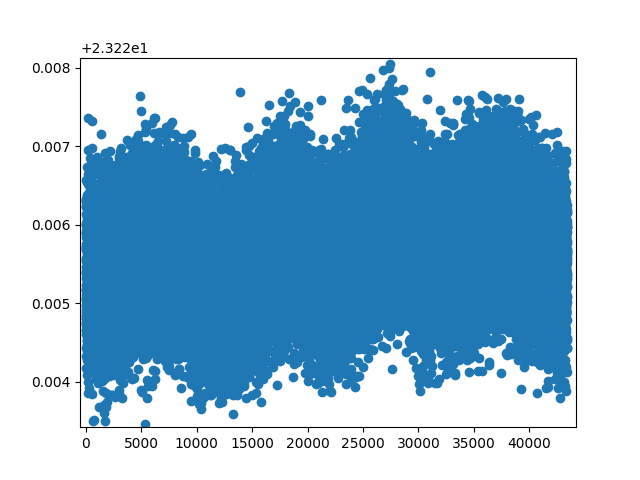

2020-01-02 15:02:36.203082 2020-01-02 15:02:37.402828


In [148]:
print(len(surf))
_, ax = plt.subplots()
ax.scatter(range(len(air)),surf)
print(dt.datetime.fromtimestamp(bb.time[0]/1e9), dt.datetime.fromtimestamp(bb.time[6000]/1e9))

<IPython.core.display.Javascript object>


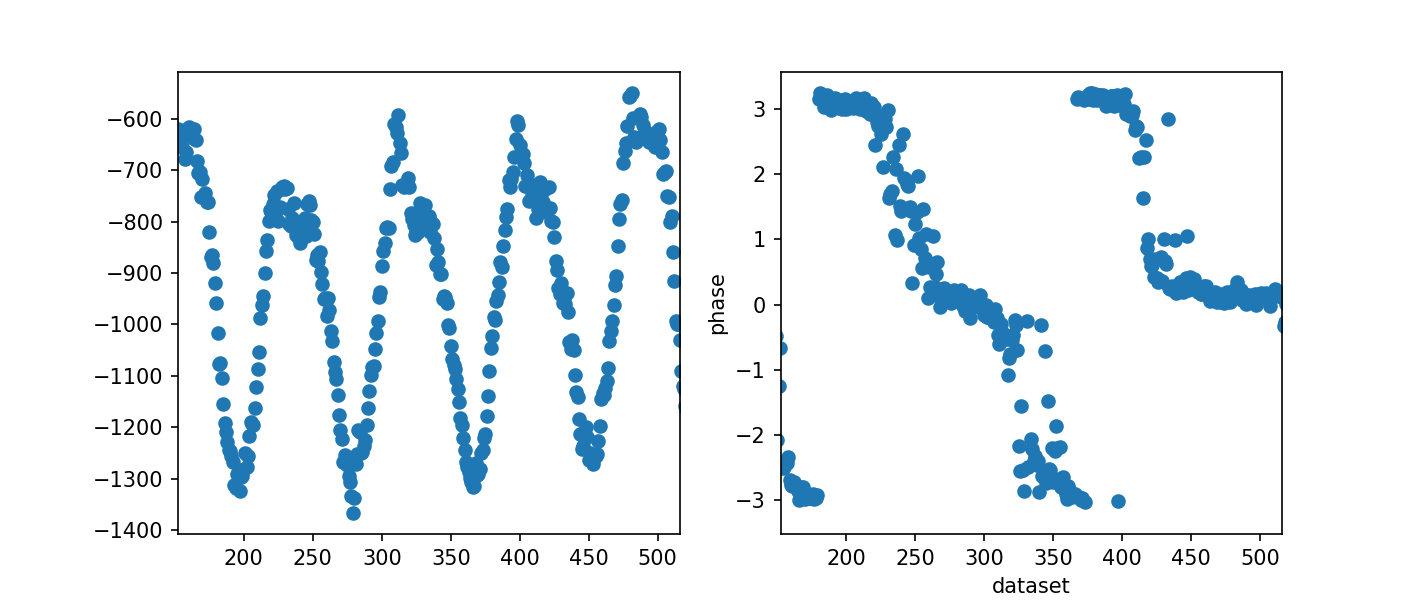

[Text(0, 0.5, 'phase'), Text(0.5, 0, 'dataset')]

In [154]:
_,ax = plt.subplots(1,2,figsize=(9.5,4), sharex=True)
# ax[0].semilogy(range(1000),(tmp_amp6/gfw.scale_X2),'.')
# ax[0].semilogy(range(1000),(tmp_amp10/gfw.scale_X2),'.')
# ax[0].semilogy(range(1000),(tmp_amp2/gfw.scale_X2),'.')
# ax[0].semilogy(range(1000),(tmp_amp3/gfw.scale_X2),'.')
# ax[0].set(ylim=(1e-18,1e-14), ylabel='Force [N]', xlabel='dataset')
# quad_sum = [np.std(bb.quad_sum) for bb in gfw.BDFs]
feedback = [np.mean(bb.feedback[2]) for bb in gfw.BDFs]
ax[0].scatter(range(1000), feedback)
phases6 = [m1_.values[4] for m1_ in m1s_6]
phases10 = [m1_.values[4] for m1_ in m1s_10]
phases2 = [m1_.values[4] for m1_ in m1s_2]
phases3 = [m1_.values[4] for m1_ in m1s_3]
ax[1].scatter(range(1000), phases6)
# ax[1].scatter(range(1000), phases10)
# ax[1].scatter(range(1000), phases2)
# ax[1].scatter(range(1000), phases3)
ax[1].set(ylabel='phase', xlabel='dataset')

In [73]:
fit_kwargs = {'alpha': 0.6, 'phase': 0, 'error_alpha': 0.1, 'error_phase': 1,
              'errordef': 1,
              'limit_alpha': [0, 1000], 'limit_phase': [-25,25],
              'fix_alpha': False, 'fix_phase': False, 'print_level': 0}
gfw.build_noise_array(sideband_freq=151, bandwidth=2)
min_13_12 = []
for i,bb in enumerate(gfw.BDFs):
    print(i,'/',datasets_num)
    min_13_12.append(gfw.get_alpha(bdf=bb, center_freq=13*12, bandwidth=2,
                          x_focous=389.7, frequency=13, lambda_par=0.0001, height=0.0, suppress_print=False,
                          **fit_kwargs)[2])

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


x2 noise rms:  1.0714265384635668
x3 noise rms:  0.23580348313305535
0 / 1000
Separation (face to face):  6.252156473447462
Stroke:  308.1621523153818
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  3.81e-01
reduced chi2:  45.51943719119788
1 / 1000
Separation (face to face):  6.247365793549738
Stroke:  316.74676811792136
Time:  10.0
Your choice of separation or height is not existing
Taking 6.0e-06 for separation
Taking 8.5e-21 for height
A separation of 6.00e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  4.77e-02
reduced chi2:  8.510715249408836
2 / 1000
Separation (face to face):  6.24759860518609
Stroke:  316.8214820730837
Time:  10.0
Your choice of separation or height is not existing
Taking 6.0e-06 for separation
Taking 

***************************************************
alpha:  1.72e-01
reduced chi2:  0.4420356788933238
22 / 1000
Separation (face to face):  6.242959826660728
Stroke:  316.7892809891094
Time:  10.0
Your choice of separation or height is not existing
Taking 6.0e-06 for separation
Taking 8.5e-21 for height
A separation of 6.00e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  1.68e-01
reduced chi2:  0.3213461786189431
23 / 1000
Separation (face to face):  6.241987130190784
Stroke:  316.7850720071764
Time:  10.0
Your choice of separation or height is not existing
Taking 6.0e-06 for separation
Taking 8.5e-21 for height
A separation of 6.00e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  1.66e-01
reduced chi2:  0.5089935842309696
24 / 1000
Separation (face to face):  6.241545673549444
Stroke:  316.78060725857887
Time:  10.0
Your choice of separation or height is not existi

***************************************************
alpha:  8.87e-02
reduced chi2:  0.3193172090373192
44 / 1000
Separation (face to face):  6.240934333196924
Stroke:  316.6909908242478
Time:  10.0
Your choice of separation or height is not existing
Taking 6.0e-06 for separation
Taking 8.5e-21 for height
A separation of 6.00e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  9.54e-02
reduced chi2:  0.42021775272130507
45 / 1000
Separation (face to face):  6.240997308977773
Stroke:  316.68708272301166
Time:  10.0
Your choice of separation or height is not existing
Taking 6.0e-06 for separation
Taking 8.5e-21 for height
A separation of 6.00e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  9.33e-02
reduced chi2:  0.19575244947985537
46 / 1000
Separation (face to face):  6.242631849487031
Stroke:  316.6827152517071
Time:  10.0
Your choice of separation or height is not exis

***************************************************
alpha:  9.64e-02
reduced chi2:  0.6050700700163814
66 / 1000
Separation (face to face):  6.246533813826977
Stroke:  316.6060909893088
Time:  10.0
Your choice of separation or height is not existing
Taking 6.0e-06 for separation
Taking 8.5e-21 for height
A separation of 6.00e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  9.91e-02
reduced chi2:  0.18931184295247203
67 / 1000
Separation (face to face):  6.247338430517095
Stroke:  316.59906318831696
Time:  10.0
Your choice of separation or height is not existing
Taking 6.0e-06 for separation
Taking 8.5e-21 for height
A separation of 6.00e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  9.27e-02
reduced chi2:  1.0267229047795274
68 / 1000
Separation (face to face):  6.247566840544584
Stroke:  316.5942606047669
Time:  10.0
Your choice of separation or height is not exist

***************************************************
alpha:  5.57e-02
reduced chi2:  3.716003210827172
88 / 1000
Separation (face to face):  6.24785853800123
Stroke:  316.5183038677004
Time:  10.0
Your choice of separation or height is not existing
Taking 6.0e-06 for separation
Taking 8.5e-21 for height
A separation of 6.00e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  7.36e-02
reduced chi2:  0.5419109208363555
89 / 1000
Separation (face to face):  6.2473684305966
Stroke:  316.51672690303656
Time:  10.0
Your choice of separation or height is not existing
Taking 6.0e-06 for separation
Taking 8.5e-21 for height
A separation of 6.00e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  5.55e-14
reduced chi2:  8.468491167633672
90 / 1000
Separation (face to face):  6.251037650895034
Stroke:  316.51260238669045
Time:  10.0
Your choice of separation or height is not existing
T

***************************************************
alpha:  1.93e-01
reduced chi2:  0.6457366296978261
110 / 1000
Separation (face to face):  6.248997688266661
Stroke:  316.46322078567454
Time:  10.0
Your choice of separation or height is not existing
Taking 6.0e-06 for separation
Taking 8.5e-21 for height
A separation of 6.00e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  2.12e-01
reduced chi2:  0.9601629874098064
111 / 1000
Separation (face to face):  6.250392333552247
Stroke:  316.45965917201835
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  1.80e-01
reduced chi2:  3.2263831750438943
112 / 1000
Separation (face to face):  6.251103877831303
Stroke:  316.45905868524346
Time:  10.0
Your choice of separation or height is not e

***************************************************
alpha:  1.11e-13
reduced chi2:  20.968798704206453
132 / 1000
Separation (face to face):  6.24836331140043
Stroke:  316.41280942225853
Time:  10.0
Your choice of separation or height is not existing
Taking 6.0e-06 for separation
Taking 8.5e-21 for height
A separation of 6.00e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  1.45e-01
reduced chi2:  0.3337123829831768
133 / 1000
Separation (face to face):  6.247230121220502
Stroke:  316.4105873568055
Time:  10.0
Your choice of separation or height is not existing
Taking 6.0e-06 for separation
Taking 8.5e-21 for height
A separation of 6.00e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  1.48e-01
reduced chi2:  1.8858692214761423
134 / 1000
Separation (face to face):  6.246447862738625
Stroke:  316.41039658618985
Time:  10.0
Your choice of separation or height is not exi

***************************************************
alpha:  9.11e-02
reduced chi2:  0.44040494097786864
154 / 1000
Separation (face to face):  6.2479836652130185
Stroke:  316.3222297852476
Time:  10.0
Your choice of separation or height is not existing
Taking 6.0e-06 for separation
Taking 8.5e-21 for height
A separation of 6.00e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  8.51e-02
reduced chi2:  0.38908141094111454
155 / 1000
Separation (face to face):  6.248012270062452
Stroke:  316.31086559189305
Time:  10.0
Your choice of separation or height is not existing
Taking 6.0e-06 for separation
Taking 8.5e-21 for height
A separation of 6.00e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  9.19e-02
reduced chi2:  0.39903166259386935
156 / 1000
Separation (face to face):  6.2479326439363145
Stroke:  316.2983108354477
Time:  10.0
Your choice of separation or height is no

***************************************************
alpha:  1.50e-01
reduced chi2:  0.3680129760973696
176 / 1000
Separation (face to face):  6.252246053934789
Stroke:  316.2764128508806
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  1.65e-01
reduced chi2:  0.31677260640041494
177 / 1000
Separation (face to face):  6.253509080344463
Stroke:  316.2735159055064
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  1.77e-01
reduced chi2:  0.36457853877588425
178 / 1000
Separation (face to face):  6.252837348352591
Stroke:  316.2758276099614
Time:  10.0
Your choice of separation or height is not ex

***************************************************
alpha:  3.06e-01
reduced chi2:  10.927241837093733
198 / 1000
Separation (face to face):  6.251956272269046
Stroke:  316.2566959889245
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  2.29e-01
reduced chi2:  53.222718207905736
199 / 1000
Separation (face to face):  6.251265055266662
Stroke:  316.2575956952159
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  3.39e-01
reduced chi2:  0.3399753902323644
200 / 1000
Separation (face to face):  6.253613187481539
Stroke:  316.2575046139179
Time:  10.0
Your choice of separation or height is not exis

***************************************************
alpha:  3.88e-01
reduced chi2:  0.7843504652020941
220 / 1000
Separation (face to face):  6.254450880816625
Stroke:  316.23512195898
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  3.54e-01
reduced chi2:  22.0203792455555
221 / 1000
Separation (face to face):  6.255169395062216
Stroke:  316.23395983280193
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  3.77e-01
reduced chi2:  2.5169943063289413
222 / 1000
Separation (face to face):  6.253100537490786
Stroke:  316.23269948581947
Time:  10.0
Your choice of separation or height is not existi

***************************************************
alpha:  2.68e-01
reduced chi2:  12.934136247396994
242 / 1000
Separation (face to face):  6.25434454269058
Stroke:  316.2068953413891
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  2.87e-01
reduced chi2:  0.5437531953708209
243 / 1000
Separation (face to face):  6.254579321311871
Stroke:  316.20529204295633
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  2.68e-01
reduced chi2:  0.7023616862508221
244 / 1000
Separation (face to face):  6.254269489269722
Stroke:  316.20518149837034
Time:  10.0
Your choice of separation or height is not exi

***************************************************
alpha:  1.03e-01
reduced chi2:  3.4791047961250765
264 / 1000
Separation (face to face):  6.254519470760135
Stroke:  316.1855400844782
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  1.10e-01
reduced chi2:  0.34327369423561965
265 / 1000
Separation (face to face):  6.255868272977045
Stroke:  316.1833481146405
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  8.08e-02
reduced chi2:  0.47157400777681674
266 / 1000
Separation (face to face):  6.256782898169581
Stroke:  316.1836719762601
Time:  10.0
Your choice of separation or height is not ex

***************************************************
alpha:  4.50e-02
reduced chi2:  22.617269556964533
286 / 1000
Separation (face to face):  6.253048721786376
Stroke:  316.1489557620577
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  3.28e-12
reduced chi2:  37.08127029877856
287 / 1000
Separation (face to face):  6.249832539692283
Stroke:  316.15379034884967
Time:  10.0
Your choice of separation or height is not existing
Taking 6.0e-06 for separation
Taking 8.5e-21 for height
A separation of 6.00e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  1.86e-01
reduced chi2:  0.3148902034334416
288 / 1000
Separation (face to face):  6.25041974569408
Stroke:  316.1556745257569
Time:  10.0
Your choice of separation or height is not exist

***************************************************
alpha:  2.76e-01
reduced chi2:  0.52477854289221
308 / 1000
Separation (face to face):  6.252202586738951
Stroke:  316.1494805179672
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  2.85e-01
reduced chi2:  0.4618009119906459
309 / 1000
Separation (face to face):  6.2518914404294375
Stroke:  316.1498009592752
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  2.81e-01
reduced chi2:  0.9213434770454201
310 / 1000
Separation (face to face):  6.252794997373007
Stroke:  316.150680711267
Time:  10.0
Your choice of separation or height is not existi

***************************************************
alpha:  2.81e-01
reduced chi2:  0.5746298089184212
330 / 1000
Separation (face to face):  6.253320871671383
Stroke:  316.1390749864816
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  2.85e-01
reduced chi2:  0.6830079370441371
331 / 1000
Separation (face to face):  6.254412783782959
Stroke:  316.1378593150196
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  2.93e-01
reduced chi2:  0.4507118396953619
332 / 1000
Separation (face to face):  6.25439140191296
Stroke:  316.1345948214126
Time:  10.0
Your choice of separation or height is not exist

***************************************************
alpha:  1.09e-01
reduced chi2:  0.15463218669686946
352 / 1000
Separation (face to face):  6.254589112614985
Stroke:  316.1169697368065
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  9.72e-02
reduced chi2:  0.30686894773578643
353 / 1000
Separation (face to face):  6.25470050176458
Stroke:  316.1142407181526
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  9.03e-02
reduced chi2:  0.2625874169588429
354 / 1000
Separation (face to face):  6.253589012703605
Stroke:  316.1171913440753
Time:  10.0
Your choice of separation or height is not exi

***************************************************
alpha:  2.39e-01
reduced chi2:  0.43013054005293777
374 / 1000
Separation (face to face):  6.251495102899957
Stroke:  316.09978885120717
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  2.60e-01
reduced chi2:  0.7521666242820904
375 / 1000
Separation (face to face):  6.249259274212681
Stroke:  316.1026388961766
Time:  10.0
Your choice of separation or height is not existing
Taking 6.0e-06 for separation
Taking 8.5e-21 for height
A separation of 6.00e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  2.71e-01
reduced chi2:  0.6757476489161145
376 / 1000
Separation (face to face):  6.251856979712249
Stroke:  316.09984144878
Time:  10.0
Your choice of separation or height is not exis

***************************************************
alpha:  4.07e-01
reduced chi2:  0.8789098707170692
396 / 1000
Separation (face to face):  6.254312786461844
Stroke:  316.08299529592364
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  4.13e-01
reduced chi2:  1.3274736965021339
397 / 1000
Separation (face to face):  6.253998759150738
Stroke:  316.0828836593635
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  4.28e-01
reduced chi2:  0.5670949194867719
398 / 1000
Separation (face to face):  6.253736901105617
Stroke:  316.0823566821355
Time:  10.0
Your choice of separation or height is not exi

***************************************************
alpha:  4.22e-01
reduced chi2:  0.975031861006473
418 / 1000
Separation (face to face):  6.257253403601657
Stroke:  316.06955648648994
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  1.11e-01
reduced chi2:  105.43470171974175
419 / 1000
Separation (face to face):  6.257409938538023
Stroke:  316.06983260077095
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  4.20e-01
reduced chi2:  1.593148211194664
420 / 1000
Separation (face to face):  6.256772458569264
Stroke:  316.0686339382569
Time:  10.0
Your choice of separation or height is not exis

***************************************************
alpha:  3.13e-01
reduced chi2:  1.599320895999451
440 / 1000
Separation (face to face):  6.254706339233996
Stroke:  316.0661889312455
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  2.96e-01
reduced chi2:  6.421531824992879
441 / 1000
Separation (face to face):  6.254062022786377
Stroke:  316.0642919047423
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  2.82e-01
reduced chi2:  0.5699530211644628
442 / 1000
Separation (face to face):  6.2548759037098645
Stroke:  316.0625121073675
Time:  10.0
Your choice of separation or height is not exist

***************************************************
alpha:  8.62e-02
reduced chi2:  0.4175465121423679
462 / 1000
Separation (face to face):  6.255653579065131
Stroke:  316.0530765985847
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  6.58e-02
reduced chi2:  3.147464594081892
463 / 1000
Separation (face to face):  6.254160023083534
Stroke:  316.05328693660726
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  0.00e+00
reduced chi2:  6.774291283608631
464 / 1000
Separation (face to face):  6.254904210270672
Stroke:  316.05260218360655
Time:  10.0
Your choice of separation or height is not exis

***************************************************
alpha:  2.22e-01
reduced chi2:  3.1818310465369417
484 / 1000
Separation (face to face):  6.256799274912657
Stroke:  316.0367120775084
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  2.11e-01
reduced chi2:  2.322661815111213
485 / 1000
Separation (face to face):  6.25726288914368
Stroke:  316.03610257944587
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  2.84e-01
reduced chi2:  0.6271227094049939
486 / 1000
Separation (face to face):  6.259504776962933
Stroke:  316.03542010730587
Time:  10.0
Your choice of separation or height is not exis

***************************************************
alpha:  4.59e-01
reduced chi2:  0.6108762156134979
506 / 1000
Separation (face to face):  6.255229215822714
Stroke:  316.0277230009255
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  4.85e-01
reduced chi2:  2.330122727624235
507 / 1000
Separation (face to face):  6.258224490710154
Stroke:  316.0267606159172
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  4.63e-01
reduced chi2:  2.303066260671711
508 / 1000
Separation (face to face):  6.256774227272535
Stroke:  316.0278348938433
Time:  10.0
Your choice of separation or height is not existi

***************************************************
alpha:  3.91e-01
reduced chi2:  1.708389425623594
528 / 1000
Separation (face to face):  6.255051813301213
Stroke:  316.0119774680828
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  3.59e-01
reduced chi2:  1.6531513905862498
529 / 1000
Separation (face to face):  6.2536854630537615
Stroke:  316.01147849701147
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  3.62e-01
reduced chi2:  0.7662303256271866
530 / 1000
Separation (face to face):  6.254316019927989
Stroke:  316.00966799555385
Time:  10.0
Your choice of separation or height is not ex

***************************************************
alpha:  9.55e-02
reduced chi2:  2.1711696011125734
550 / 1000
Separation (face to face):  6.253350067802307
Stroke:  316.00401802780755
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  1.26e-01
reduced chi2:  2.0132015164298154
551 / 1000
Separation (face to face):  6.252320250045193
Stroke:  316.00243954640615
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  1.21e-01
reduced chi2:  2.006871155570382
552 / 1000
Separation (face to face):  6.253126076106957
Stroke:  316.0011694430253
Time:  10.0
Your choice of separation or height is not exi

***************************************************
alpha:  3.59e-01
reduced chi2:  6.471437507350665
572 / 1000
Separation (face to face):  6.256594913598269
Stroke:  315.98916280337875
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  3.02e-01
reduced chi2:  6.33181447221836
573 / 1000
Separation (face to face):  6.25530596074791
Stroke:  315.9886955872059
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  3.44e-01
reduced chi2:  3.521795221055935
574 / 1000
Separation (face to face):  6.257860609640522
Stroke:  315.98723942733614
Time:  10.0
Your choice of separation or height is not existin

***************************************************
alpha:  8.20e-01
reduced chi2:  7.106491386410187
594 / 1000
Separation (face to face):  6.25710536774867
Stroke:  315.98378302178605
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  8.17e-01
reduced chi2:  0.8035264270708055
595 / 1000
Separation (face to face):  6.256544072155952
Stroke:  315.98201179029024
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  8.05e-01
reduced chi2:  2.038895759293981
596 / 1000
Separation (face to face):  6.256702234674583
Stroke:  315.9819116406406
Time:  10.0
Your choice of separation or height is not exist

***************************************************
alpha:  6.54e-01
reduced chi2:  4.000833659858713
616 / 1000
Separation (face to face):  6.257097407126059
Stroke:  315.9787334387914
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  6.09e-01
reduced chi2:  15.568492224904098
617 / 1000
Separation (face to face):  6.256662640177387
Stroke:  315.9802747271025
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  7.75e-01
reduced chi2:  1.4955683699476447
618 / 1000
Separation (face to face):  6.256556154909992
Stroke:  315.9769877110205
Time:  10.0
Your choice of separation or height is not exist

***************************************************
alpha:  5.19e-01
reduced chi2:  5.268664438450248
638 / 1000
Separation (face to face):  6.25253991933622
Stroke:  315.9680479058437
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  5.08e-01
reduced chi2:  22.822646568187658
639 / 1000
Separation (face to face):  6.253542259916719
Stroke:  315.9666591846372
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  5.40e-01
reduced chi2:  1.514566559791937
640 / 1000
Separation (face to face):  6.2535651430952495
Stroke:  315.96701391663333
Time:  10.0
Your choice of separation or height is not exist

***************************************************
alpha:  4.32e-01
reduced chi2:  1.9537773657095485
660 / 1000
Separation (face to face):  6.254649717836605
Stroke:  315.96025910556705
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  3.58e-01
reduced chi2:  2.9453123246073827
661 / 1000
Separation (face to face):  6.256046995644374
Stroke:  315.9587011087767
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  3.32e-01
reduced chi2:  1.3272742294616007
662 / 1000
Separation (face to face):  6.254415220220073
Stroke:  315.96148948261475
Time:  10.0
Your choice of separation or height is not ex

***************************************************
alpha:  3.18e-01
reduced chi2:  1.6379936492263274
682 / 1000
Separation (face to face):  6.258889143313956
Stroke:  315.95680103413184
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  4.41e-01
reduced chi2:  9.849550047164069
683 / 1000
Separation (face to face):  6.2568632116889145
Stroke:  315.9581061716105
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  5.56e-01
reduced chi2:  4.188961031668108
684 / 1000
Separation (face to face):  6.258019383082489
Stroke:  315.9576215190126
Time:  10.0
Your choice of separation or height is not exis

***************************************************
alpha:  6.30e-01
reduced chi2:  13.500850744274896
704 / 1000
Separation (face to face):  6.25624551118924
Stroke:  315.9530845965727
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  3.10e-01
reduced chi2:  186.2841266741413
705 / 1000
Separation (face to face):  6.256261601161929
Stroke:  315.95034448199806
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  5.94e-01
reduced chi2:  2.1011225918102796
706 / 1000
Separation (face to face):  6.256224578626961
Stroke:  315.95018700385083
Time:  10.0
Your choice of separation or height is not exis

***************************************************
alpha:  5.62e-01
reduced chi2:  11.281403817712585
726 / 1000
Separation (face to face):  6.2530129807266
Stroke:  315.951048036354
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  5.75e-01
reduced chi2:  18.35812149658964
727 / 1000
Separation (face to face):  6.253982120311752
Stroke:  315.95142287699895
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  5.17e-01
reduced chi2:  124.6550768371322
728 / 1000
Separation (face to face):  6.25374205696969
Stroke:  315.950421763857
Time:  10.0
Your choice of separation or height is not existing
T

***************************************************
alpha:  1.21e-01
reduced chi2:  0.8569466313907503
748 / 1000
Separation (face to face):  6.256518760694382
Stroke:  315.94823765790545
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  1.76e-01
reduced chi2:  1.027443478358652
749 / 1000
Separation (face to face):  6.256121068679624
Stroke:  315.94793603741726
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  2.25e-01
reduced chi2:  0.9783168480705798
750 / 1000
Separation (face to face):  6.257021031194119
Stroke:  315.94607967285225
Time:  10.0
Your choice of separation or height is not ex

***************************************************
alpha:  5.38e-02
reduced chi2:  0.4788300836315503
770 / 1000
Separation (face to face):  6.258052076222077
Stroke:  315.9373154192794
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  1.81e-01
reduced chi2:  0.9833112373463738
771 / 1000
Separation (face to face):  6.257018709779947
Stroke:  315.9371845625466
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  1.23e-01
reduced chi2:  0.4020887890181596
772 / 1000
Separation (face to face):  6.256021059896602
Stroke:  315.93835195570523
Time:  10.0
Your choice of separation or height is not exi

***************************************************
alpha:  1.88e-01
reduced chi2:  0.6435518133995375
792 / 1000
Separation (face to face):  6.2541612267537285
Stroke:  315.9342524928478
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  1.68e-01
reduced chi2:  1.2099305107003249
793 / 1000
Separation (face to face):  6.253538938717872
Stroke:  315.9326458929556
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  1.71e-01
reduced chi2:  1.3145375410080693
794 / 1000
Separation (face to face):  6.254101122470308
Stroke:  315.93353647704834
Time:  10.0
Your choice of separation or height is not ex

***************************************************
alpha:  3.11e-01
reduced chi2:  1.1907909145316427
814 / 1000
Separation (face to face):  6.252999531051932
Stroke:  315.92452234024773
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  4.43e-01
reduced chi2:  5.329233722558541
815 / 1000
Separation (face to face):  6.2542640079147755
Stroke:  315.9263710278692
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  4.58e-01
reduced chi2:  1.6026010881183146
816 / 1000
Separation (face to face):  6.255193067893719
Stroke:  315.92423801925963
Time:  10.0
Your choice of separation or height is not ex

***************************************************
alpha:  4.56e-01
reduced chi2:  11.942825580469869
836 / 1000
Separation (face to face):  6.253025695198721
Stroke:  315.918574515976
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  1.46e-02
reduced chi2:  260.49762550886527
837 / 1000
Separation (face to face):  6.253488721156918
Stroke:  315.91722374814105
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  5.72e-01
reduced chi2:  1.031695786270476
838 / 1000
Separation (face to face):  6.253922992288983
Stroke:  315.91545318953274
Time:  10.0
Your choice of separation or height is not exis

***************************************************
alpha:  1.37e-01
reduced chi2:  1.5139983025864125
858 / 1000
Separation (face to face):  6.257392802058609
Stroke:  315.9104190225486
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  1.69e-01
reduced chi2:  1.4647846476550643
859 / 1000
Separation (face to face):  6.256782689614203
Stroke:  315.90842049314193
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  1.32e-01
reduced chi2:  1.6547748232682948
860 / 1000
Separation (face to face):  6.258011583049074
Stroke:  315.90758110338226
Time:  10.0
Your choice of separation or height is not ex

***************************************************
alpha:  4.78e-02
reduced chi2:  4.007473521004945
880 / 1000
Separation (face to face):  6.254134811375229
Stroke:  315.9017182196008
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  2.01e-01
reduced chi2:  9.758735893115903
881 / 1000
Separation (face to face):  6.252589109673897
Stroke:  315.9057159481408
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  1.20e-01
reduced chi2:  8.392005414224862
882 / 1000
Separation (face to face):  6.250653822752247
Stroke:  315.9060778314556
Time:  10.0
Your choice of separation or height is not existin

***************************************************
alpha:  2.29e-01
reduced chi2:  15.895440883258223
902 / 1000
Separation (face to face):  6.25482988001753
Stroke:  315.8960179001801
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  2.80e-01
reduced chi2:  11.543047147336036
903 / 1000
Separation (face to face):  6.257935851025797
Stroke:  315.8950387834487
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  3.94e-01
reduced chi2:  2.6473999569308533
904 / 1000
Separation (face to face):  6.25561537240103
Stroke:  315.89394203592116
Time:  10.0
Your choice of separation or height is not exist

***************************************************
alpha:  1.91e-01
reduced chi2:  19.49659665861802
924 / 1000
Separation (face to face):  6.2543663632495505
Stroke:  315.8901427810733
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  3.39e-01
reduced chi2:  1.705846984921364
925 / 1000
Separation (face to face):  6.254746261343689
Stroke:  315.89114739915885
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  4.04e-01
reduced chi2:  1.1504040378032478
926 / 1000
Separation (face to face):  6.255909752943387
Stroke:  315.8901190782974
Time:  10.0
Your choice of separation or height is not exis

***************************************************
alpha:  6.96e-02
reduced chi2:  55.98146794613672
946 / 1000
Separation (face to face):  6.256942601406683
Stroke:  315.8876889874661
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  6.95e-02
reduced chi2:  22.666929720081683
947 / 1000
Separation (face to face):  6.25786022427676
Stroke:  315.8858984242164
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  2.76e-01
reduced chi2:  5.4462745149940055
948 / 1000
Separation (face to face):  6.25626125487438
Stroke:  315.8873126762753
Time:  10.0
Your choice of separation or height is not existin

***************************************************
alpha:  3.21e-01
reduced chi2:  10.031953858872212
968 / 1000
Separation (face to face):  6.25474640251557
Stroke:  315.8825326262272
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  2.64e-01
reduced chi2:  6.511879133592874
969 / 1000
Separation (face to face):  6.254291733238608
Stroke:  315.8842448070745
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  2.59e-01
reduced chi2:  2.901440917654271
970 / 1000
Separation (face to face):  6.2544823207230476
Stroke:  315.88439571626407
Time:  10.0
Your choice of separation or height is not exist

***************************************************
alpha:  1.25e-01
reduced chi2:  1.781441628216513
990 / 1000
Separation (face to face):  6.2530601839557445
Stroke:  315.8784031558079
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  1.79e-01
reduced chi2:  3.825842806769811
991 / 1000
Separation (face to face):  6.2544173975754
Stroke:  315.87577731024777
Time:  10.0
Your choice of separation or height is not existing
Taking 6.5e-06 for separation
Taking 8.5e-21 for height
A separation of 6.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  1.35e-01
reduced chi2:  2.678955784016911
992 / 1000
Separation (face to face):  6.253105503320546
Stroke:  315.8771987726441
Time:  10.0
Your choice of separation or height is not existin

<IPython.core.display.Javascript object>


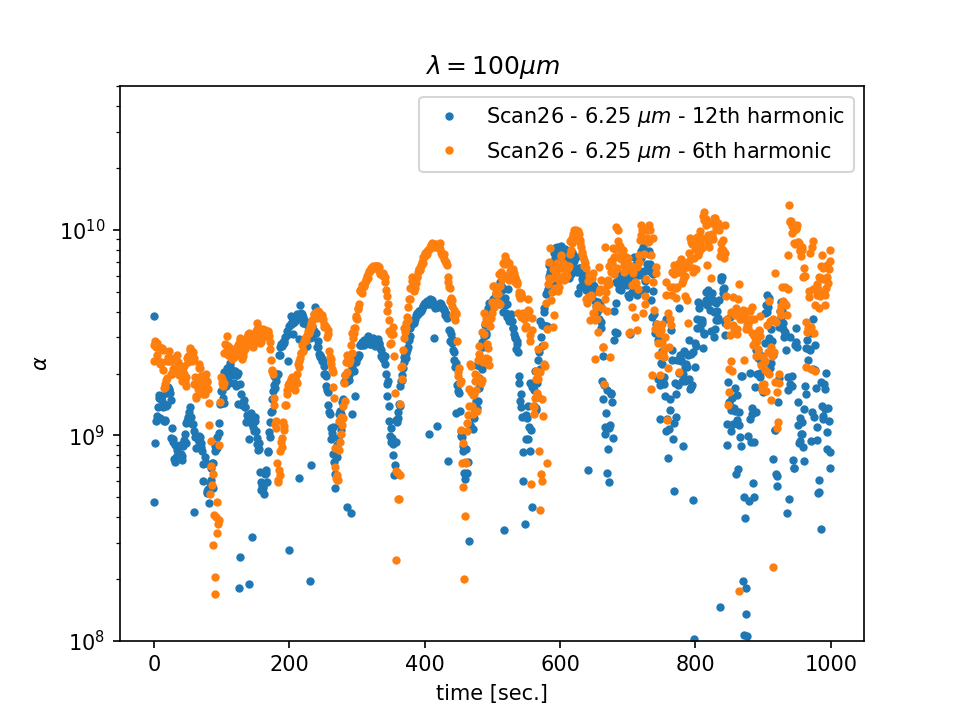

In [91]:
_, ax = plt.subplots()
# ax.semilogy(np.arange(100)*10, np.array(mm_26)*1e10, '.', label=r'Scan26 - 8.7 $\mu m$')
# ax.semilogy(np.arange(100)*10, np.array(mm_26_1)*1e10, '.', label=r'Scan26 - 8.7 $\mu m$ limited phase')
# ax.semilogy(np.arange(100)*10, np.array(mm_26_2)*1e10, '.', label=r'Scan26 - 8.7 $\mu m$ - 4th harmonic')
# ax.semilogy(np.arange(1000), np.array(mm_13)*1e10, '.', label=r'Scan26 - 6.25 $\mu m$ - 100Hz band')
ax.semilogy(np.arange(1000), np.array(mm_13_12)*1e10, '.', label=r'Scan26 - 6.25 $\mu m$ - 12th harmonic')
ax.semilogy(np.arange(1000), np.array(mm_13_6)*1e10*0.8, '.', label=r'Scan26 - 6.25 $\mu m$ - 6th harmonic')
# ax.semilogy(np.arange(1000), np.array(mm_15)*1e10, '.', label='15Hz template')
ax.set(ylim=(1e8,5e10), xlabel='time [sec.]', ylabel=r'$\alpha$', title=r'$\lambda=100 \mu m $')
ax.legend()

<IPython.core.display.Javascript object>


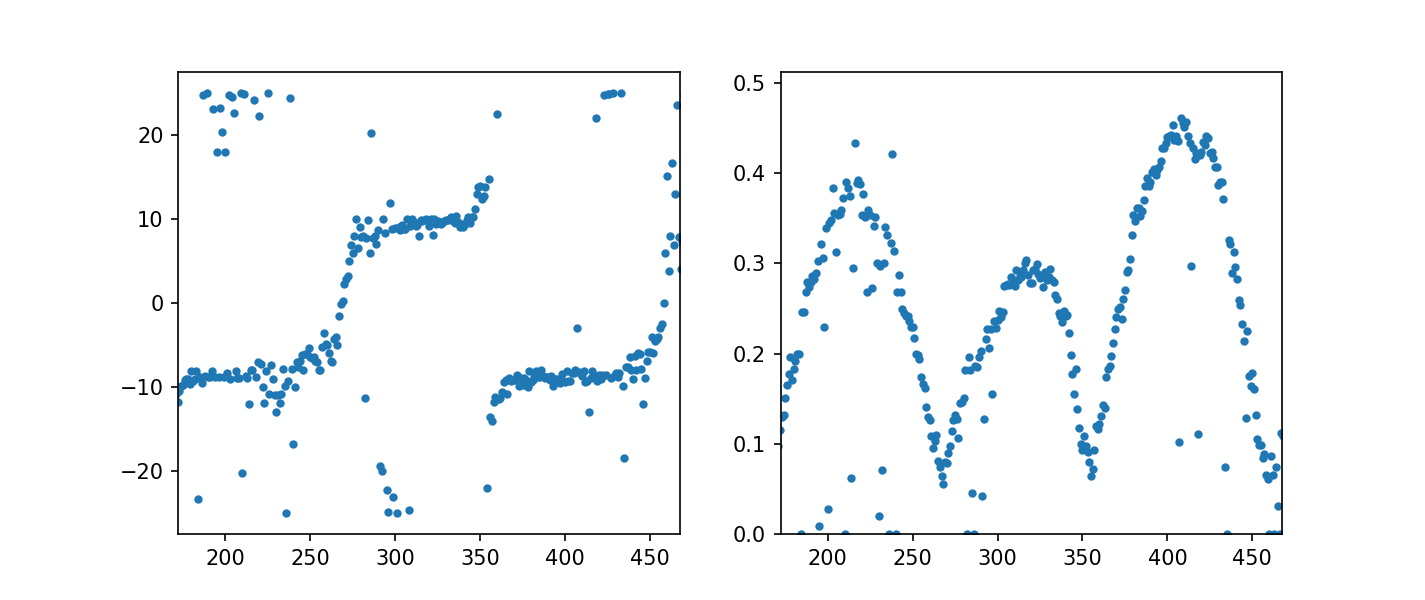

In [85]:
phases_13_12 = [mm.values[1] for mm in min_13_12]
amps_13_12 = [mm.values[0] for mm in min_13_12]
_,ax = plt.subplots(1,2,figsize=(9.5,4), sharex=True)
ax[0].plot(range(1000), phases_13_12, '.')
ax[1].plot(range(1000), amps_13_12, '.')

<IPython.core.display.Javascript object>


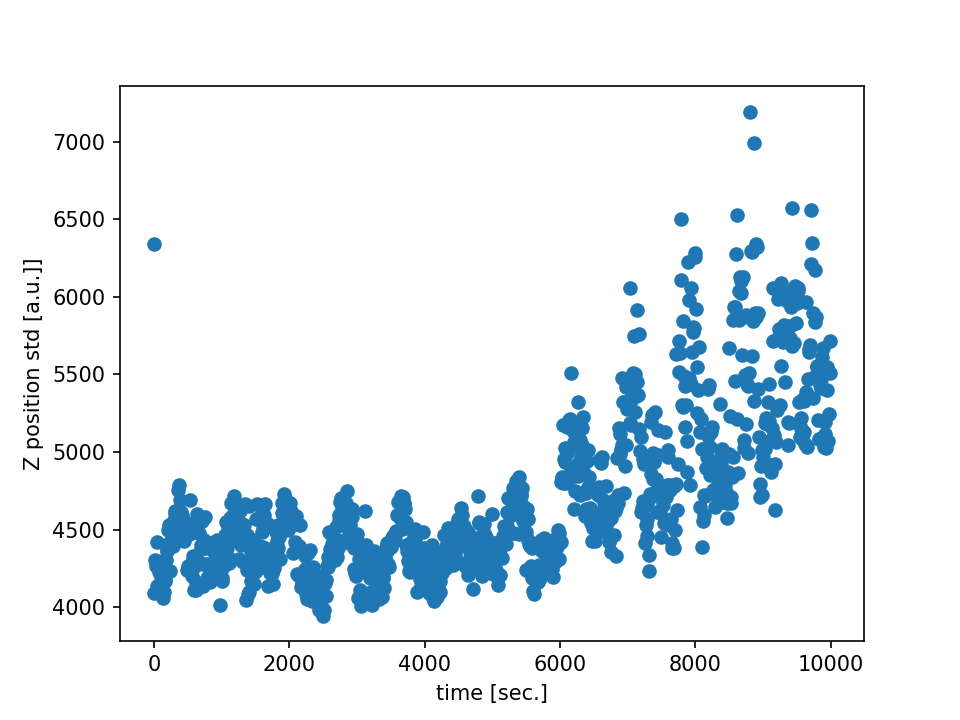

[Text(0, 0.5, 'Z position std [a.u.]]'), Text(0.5, 0, 'time [sec.]')]

In [94]:
bb = gfw.BDFs[500]
pos_z = [np.std(bb.z2) for bb in gfw.BDFs]
pos_z2 = [np.mean(bb.phase[0])-np.mean(bb.phase[1]) for bb in gfw.BDFs]
# pos_z3 = [np.mean(bb.phase[0])-np.mean(bb.phase[2]) for bb in gfw.BDFs]
_,ax = plt.subplots()
ax.scatter(np.arange(1000)*10, pos_z)
ax.set(xlabel='time [sec.]', ylabel='Z position std [a.u.]]')
# ax[1].scatter(range(1000), pos_z3)

<IPython.core.display.Javascript object>


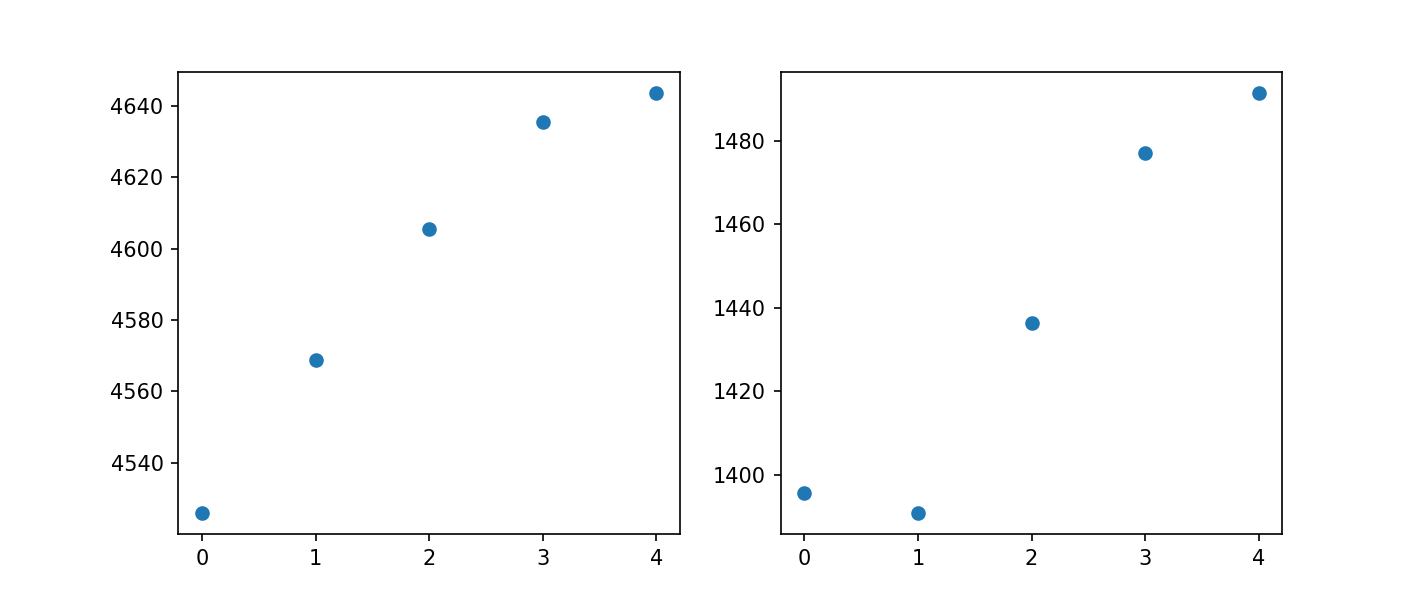

In [61]:
pos_z2 = [np.mean(bb.phase[0])-np.mean(bb.phase[1]) for bb in bdf_x]
pos_z3 = [np.mean(bb.phase[0])-np.mean(bb.phase[2]) for bb in bdf_x]
_,ax = plt.subplots(1,2,figsize=(9.5,4))
ax[0].scatter(range(5), pos_z2)
ax[1].scatter(range(5), pos_z3)

In [ ]:
fit_kwargs = {'alpha': 0.6, 'phase': 0, 'error_alpha': 0.1, 'error_phase': 1,
              'errordef': 1,
              'limit_alpha': [0, 1000], 'limit_phase': [-25,25],
              'fix_alpha': False, 'fix_phase': False, 'print_level': 0}
gfw.build_noise_array(sideband_freq=151, bandwidth=2)
mm_13_12_2 = []
for i,bb in enumerate(gfw.BDFs):
    print(i,'/',datasets_num)
    mm_13_12_2.append(gfw.get_alpha2(bdf=bb, center_freq=13*12, bandwidth=2,
                          x_focous=389.7, frequency=13, lambda_par=0.0001, height=0.0, suppress_print=False,
                          **fit_kwargs)[2])

<IPython.core.display.Javascript object>


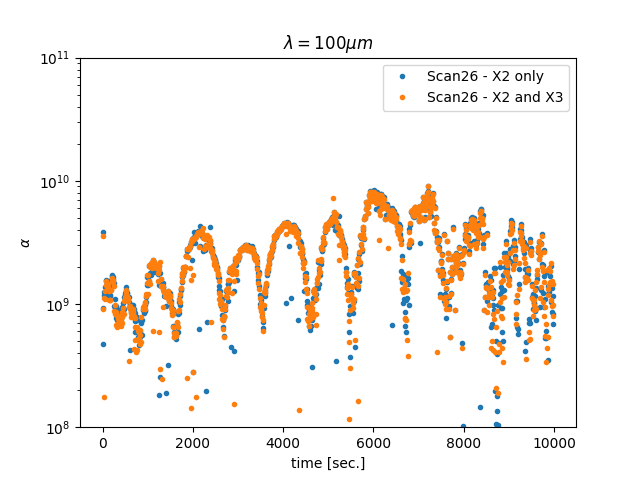

In [19]:
_, ax = plt.subplots()
ax.semilogy(np.arange(1000)*10, np.array(mm_13_12)*1e10, '.', label=r'Scan26 - X2 only')
ax.semilogy(np.arange(1000)*10, np.array(mm_13_12_2)*1e10, '.', label=r'Scan26 - X2 and X3')
ax.set(ylim=(1e8,1e11), xlabel='time [sec.]', ylabel=r'$\alpha$', title=r'$\lambda=100 \mu m $')
ax.legend()

In [ ]:
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

In [ ]:
samples = np.array(mm_17)
print('C.I. ', bs.bootstrap(samples, stat_func=bs_stats.mean, num_iterations=100, alpha=0.05, is_pivotal=False))

In [ ]:
#old
samples = np.array(mm_26)
print('C.I. ', bs.bootstrap(samples, stat_func=bs_stats.mean, num_iterations=10000, alpha=0.05, is_pivotal=False))
ll = bs.bootstrap(samples, stat_func=bs_stats.mean, num_iterations=10000, alpha=0.05, is_pivotal=False)
ll.upper_bound

In [ ]:
ll = bs.bootstrap(samples, stat_func=bs_stats.mean, num_iterations=10000, alpha=0.05, is_pivotal=False)
ll

### Limit

In [ ]:
L = np.logspace(0.3, 3, 50)*1e-6
lim = []
for L_ in L:
    fit_kwargs = {'alpha': 0.6, 'phase': 0, 'error_alpha': 0.1, 'error_phase': 1,
              'errordef': 1,
              'limit_alpha': [0, 1000], 'limit_phase': [-25,25],
              'fix_alpha': False, 'fix_phase': False, 'print_level': 0}
    gfw.build_noise_array(sideband_freq=151, bandwidth=2)
    mm_17 = [gfw.get_alpha(bdf=gfw.BDFs[i],center_freq=13*12, bandwidth=2, separation=6.2e-6, frequency=13,
              lambda_par=L_, stroke=300e-6,**fit_kwargs)[0] for i in range(datasets_num)]
    samples = np.array(mm_17)
    lim.append(bs.bootstrap(samples, stat_func=bs_stats.mean, num_iterations=100, alpha=0.05, is_pivotal=False).upper_bound)

In [ ]:
print(lim)

In [ ]:
print(L)

In [ ]:
_,ax = plt.subplots()
ax.loglog(L,np.array(lim)*1e10)

<IPython.core.display.Javascript object>


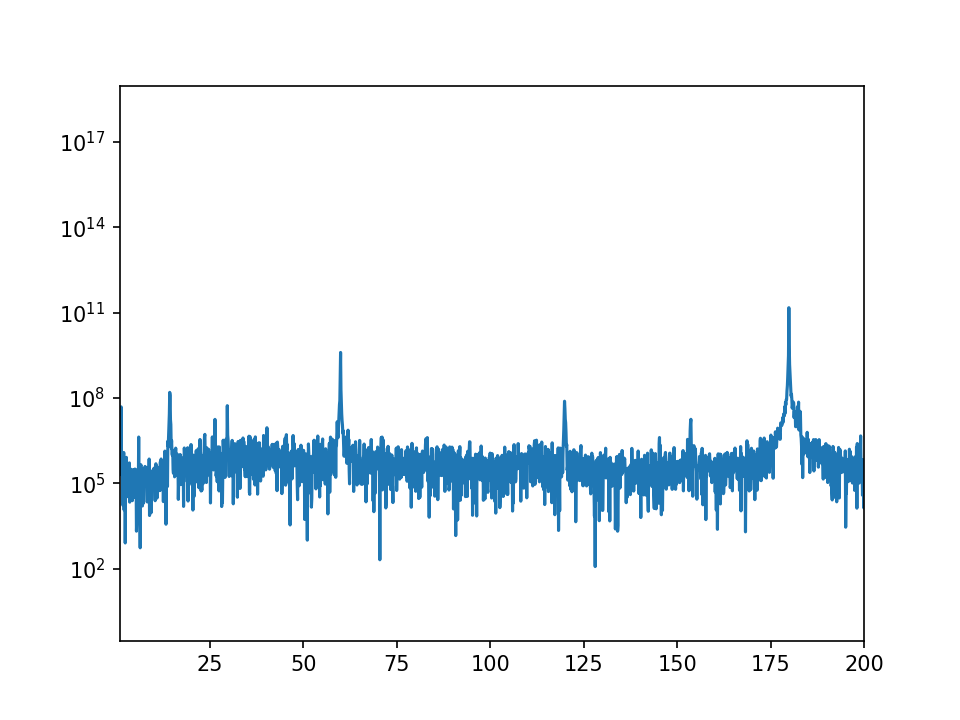

[(1, 200)]

In [30]:
fname = r'/data/new_trap/20200107/Bead3/Shaking/Shaking380/Shaking13_201.h5'
fname2 = r'/data/new_trap/20200107/Bead3/Discharge/Discharge_93.h5'
# fname2 = r'/data/new_trap/20200107/Bead3/InitialTest/Data30.h5'
bdf = BeadDataFile.BeadDataFile(fname=fname)
bdf2 = BeadDataFile.BeadDataFile(fname=fname2)
_,ax = plt.subplots()
ax.semilogy(*bdf.psd2('z'))
# ax.semilogy(*bdf2.psd2('z'))
ax.set(xlim=(1,200))